In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

IMG_PATH = '/home/belerico/projects/sae-transfer-learning/imgs/'
EVAL_PATH = '/home/belerico/projects/sae-transfer-learning/eval/'
os.makedirs(IMG_PATH, exist_ok=True)

### Baseline

In [2]:
baseline = pd.read_csv(EVAL_PATH + "rs-post_all_mse.csv")
baseline.rename(columns={'Unnamed: 0':'L'}, inplace=True)
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,0.868826,9.735006e+00,262144.0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,0.444341,3.858809e+01,262144.0
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,-0.541333,1.281156e+02,262144.0
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,-0.516962,1.158979e+02,262144.0
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,-0.930730,1.292232e+02,262144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,-1412.256836,1.014024e+06,262144.0
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,-2043.666382,1.628885e+06,262144.0
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,-3598.639404,2.343972e+06,262144.0
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,-1200.900024,8.081392e+05,262144.0


In [3]:
baseline[["ACT-Layer", "SAE-Layer"]] = baseline["L"].str.split("-", n=1, expand=True)
baseline["ACT-Layer"] = baseline["ACT-Layer"].astype(int)
baseline["SAE-Layer"] = baseline["SAE-Layer"].astype(int)
baseline = baseline.sort_values(by=["ACT-Layer", "SAE-Layer"])
baseline

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,0.868826,9.735006e+00,262144.0,0,0
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,0.444341,3.858809e+01,262144.0,0,1
2,0-2,NaN,NaN,4.935888,3.115358,15.213541,NaN,0.849520,8.957768,13.506168,1.446785,132.794434,34.878029,-0.541333,1.281156e+02,262144.0,0,2
3,0-3,NaN,NaN,5.234643,3.203166,13.053946,NaN,0.793775,8.992187,13.562613,1.462650,212.265137,48.625744,-0.516962,1.158979e+02,262144.0,0,3
4,0-4,NaN,NaN,4.974465,3.009706,14.885315,NaN,0.834555,8.945927,14.590097,1.599722,351.324097,71.443054,-0.930730,1.292232e+02,262144.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,11-7,NaN,NaN,11.318004,3.034473,10.157478,NaN,-0.162926,86.214539,984.788696,11.307749,4222.083008,13903.743164,-1412.256836,1.014024e+06,262144.0,11,7
140,11-8,NaN,NaN,12.011387,3.094152,10.491833,NaN,-0.205410,81.641319,1222.830811,14.809101,4413.660645,13764.156250,-2043.666382,1.628885e+06,262144.0,11,8
141,11-9,NaN,NaN,11.833664,3.072817,10.092566,NaN,-0.248028,88.120010,1500.049316,16.967474,4482.791016,14590.498047,-3598.639404,2.343972e+06,262144.0,11,9
142,11-10,NaN,NaN,11.993760,3.122844,10.124535,NaN,-0.266968,84.013306,891.071533,10.497403,3546.361328,7884.976562,-1200.900024,8.081392e+05,262144.0,11,10


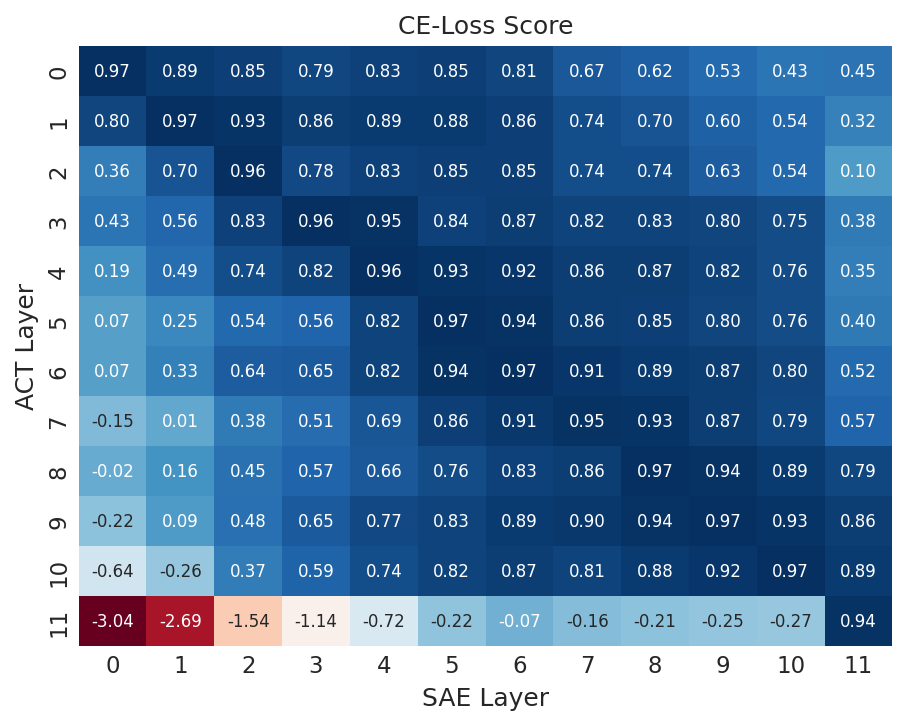

In [4]:
sns.set_context("paper")

# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2), dpi=150)
sns.set_theme()
ax = sns.heatmap(
    baseline[["ce_loss_score"]].to_numpy().reshape(12, 12),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False
)
ax.set_title("CE-Loss Score")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("SAE Layer")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_ce_loss_score.png")
plt.show()

### Forward

In [5]:
mapping = {
    '1': '100003840',
    '2': '200003584',
    '3': '300003328',
    '4': '400003072',
    'final': 'final_500002816'
}

ckpt = mapping['final']

In [6]:
fwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_forward_{ckpt}_all_mse.csv")
fwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
fwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated
0,0-0,NaN,NaN,4.101486,3.065878,14.046822,NaN,0.905690,8.892148,10.773813,1.201880,32.910156,14.861841,0.467440,35.256271,262144.0
1,1-0,NaN,NaN,3.467058,3.065878,14.779825,NaN,0.965752,11.600180,10.071616,0.867692,17.074463,12.312510,0.790230,20.078129,262144.0
2,2-0,NaN,NaN,5.741760,3.065878,11.822902,NaN,0.694430,13.056845,8.235033,0.629838,14.222900,8.754515,0.411163,70.764526,262144.0
3,3-0,NaN,NaN,10.377010,3.065878,16.673855,NaN,0.462732,14.201983,6.731951,0.476456,24.039551,10.443562,0.174924,163.984802,262144.0
4,4-0,NaN,NaN,8.634165,3.065878,13.445559,NaN,0.463540,14.809937,6.350005,0.432284,31.853516,12.751270,0.055751,198.645477,262144.0


In [7]:
fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int) + 1
fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
fwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,4.101486,3.065878,14.046822,NaN,0.905690,8.892148,10.773813,1.201880,32.910156,14.861841,0.467440,35.256271,262144.0,0,1
12,0-1,NaN,NaN,4.669418,3.065878,14.046822,NaN,0.853971,8.892148,13.086042,1.445637,83.781494,25.978752,-0.301929,91.431335,262144.0,0,2
24,0-2,NaN,NaN,5.035533,3.065878,14.046822,NaN,0.820630,8.892148,13.884325,1.532447,175.361450,42.328377,-0.694128,116.334557,262144.0,0,3
36,0-3,NaN,NaN,5.140078,3.065878,14.046822,NaN,0.811109,8.892148,14.486532,1.598235,270.301025,59.240322,-0.996507,133.915604,262144.0,0,4
48,0-4,NaN,NaN,5.276780,3.065878,14.046822,NaN,0.798660,8.892148,18.623629,2.070233,490.916382,104.708862,-2.784307,233.662750,262144.0,0,5


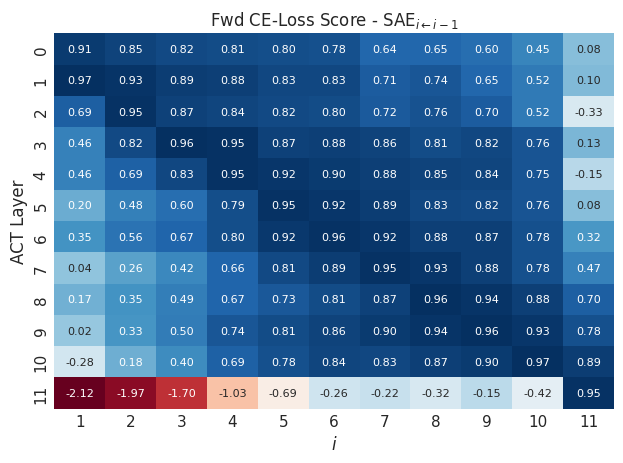

In [8]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    fwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False,
)
ax.set_title("Fwd CE-Loss Score - SAE$_{i \leftarrow i-1}$")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("$i$")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.tight_layout()
plt.show()

### Backward

In [9]:
bwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_backward_{ckpt}_all_mse.csv")
bwd.rename(columns={'Unnamed: 0':'L'}, inplace=True)
bwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated
0,0-1,NaN,NaN,3.411138,3.065878,14.046822,NaN,0.968558,8.892148,7.735016,0.874167,15.367920,9.498478,0.867004,10.042897,262144.0
1,1-1,NaN,NaN,4.666006,3.065878,14.779825,NaN,0.863400,11.600180,7.657248,0.663786,14.083618,9.113344,0.457013,50.912827,262144.0
2,2-1,NaN,NaN,7.633606,3.065878,11.822902,NaN,0.478393,13.056845,6.414547,0.490447,12.645142,6.713534,0.190480,105.102196,262144.0
3,3-1,NaN,NaN,10.911276,3.065878,16.673855,NaN,0.423471,14.201983,5.834427,0.406175,25.460449,9.798965,0.057506,211.271622,262144.0
4,4-1,NaN,NaN,9.877913,3.065878,13.445559,NaN,0.343714,14.809937,5.837604,0.390966,36.333008,13.319580,-0.051147,240.129639,262144.0


In [10]:
bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int) - 1
bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
bwd.head()

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-1,NaN,NaN,3.411138,3.065878,14.046822,NaN,0.968558,8.892148,7.735016,0.874167,15.367920,9.498478,0.867004,10.042897,262144.0,0,0
12,0-2,NaN,NaN,4.285240,3.065878,14.046822,NaN,0.888957,8.892148,10.814079,1.202030,48.276733,16.551495,0.383671,43.078613,262144.0,0,1
24,0-3,NaN,NaN,4.968546,3.065878,14.046822,NaN,0.826730,8.892148,12.179924,1.332887,99.908691,25.822317,-0.246099,100.110985,262144.0,0,2
36,0-4,NaN,NaN,5.097346,3.065878,14.046822,NaN,0.815001,8.892148,12.578314,1.384887,179.403076,40.000458,-0.371003,95.706161,262144.0,0,3
48,0-5,NaN,NaN,5.026433,3.065878,14.046822,NaN,0.821458,8.892148,13.644230,1.510207,306.856812,61.849030,-0.720416,111.632004,262144.0,0,4


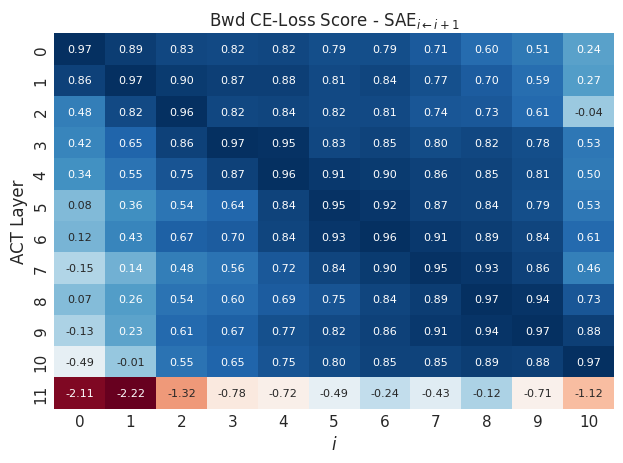

In [11]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
sns.set_theme()
ax = sns.heatmap(
    bwd[["ce_loss_score"]].to_numpy().reshape(12, 11),
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False,
)
ax.set_title("Bwd CE-Loss Score - SAE$_{i \leftarrow i+1}$")
ax.set_ylabel("ACT Layer")
ax.set_xlabel("$i$")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.tight_layout()
plt.show()

In [12]:
# TODO:
# - Add one plot for checkpoint
# - Plot/Show-table for L0 and L1

### Baseline - fwd/bwd CE-Loss

In [13]:
baseline[baseline["ACT-Layer"] - 1 == baseline["SAE-Layer"]].head()  # Forward baseline i on i+1

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
12,1-0,NaN,NaN,5.350231,3.065878,14.779825,NaN,0.804989,11.600180,7.204940,0.595609,14.550903,10.071194,0.340051,291.185150,262144.0,1,0
25,2-1,NaN,NaN,5.715965,3.160122,11.663170,NaN,0.699420,12.668333,8.236341,0.650453,19.892578,9.337999,0.429315,64.720695,262144.0,2,1
38,3-2,NaN,NaN,5.545763,3.115358,17.471745,NaN,0.830709,13.774193,9.375708,0.675856,59.097168,20.304142,0.433316,86.722862,262144.0,3,2
51,4-3,NaN,NaN,4.880911,3.203166,12.468016,NaN,0.818913,14.624746,9.959815,0.671460,61.574829,20.110771,0.485770,78.664383,262144.0,4,3
64,5-4,NaN,NaN,4.900346,3.009706,13.729712,NaN,0.823634,17.564312,11.085056,0.609076,74.170410,23.440769,0.291280,120.464630,262144.0,5,4


In [14]:
baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1].head()  # Backward baseline i on i-1

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,0.444341,38.588085,262144.0,0,1
14,1-2,NaN,NaN,4.005270,3.115358,15.982838,NaN,0.930840,11.296371,11.002556,0.952868,55.972656,19.091072,0.519058,69.278900,262144.0,1,2
27,2-3,NaN,NaN,4.945744,3.203166,11.029239,NaN,0.777337,12.878527,11.017860,0.830533,73.272827,26.313818,0.488184,142.942963,262144.0,2,3
40,3-4,NaN,NaN,3.730921,3.009706,17.394283,NaN,0.949862,13.969690,12.371120,0.883886,121.014771,35.400150,0.594157,62.342289,262144.0,3,4
53,4-5,NaN,NaN,4.013016,3.079556,17.433718,NaN,0.934969,14.427039,14.894337,1.028894,137.443115,40.874561,0.477879,92.044044,262144.0,4,5


In [15]:
baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]].head()  # Baseline i on i

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
0,0-0,NaN,NaN,3.408097,3.065878,14.046822,NaN,0.968835,8.892148,7.750052,0.875380,13.532349,9.460178,0.868826,9.735006,262144.0,0,0
13,1-1,NaN,NaN,3.500633,3.160122,14.631824,NaN,0.970317,11.133117,9.606907,0.862971,21.895020,12.212226,0.792521,19.478878,262144.0,1,1
26,2-2,NaN,NaN,3.485169,3.115358,12.680796,NaN,0.961339,12.692200,10.782604,0.849783,34.881470,16.570456,0.761439,28.633408,262144.0,2,2
39,3-3,NaN,NaN,3.668775,3.203166,16.018127,NaN,0.963667,14.005279,11.650215,0.827500,71.514771,24.955875,0.774386,33.942139,262144.0,3,3
52,4-4,NaN,NaN,3.464720,3.009706,14.586422,NaN,0.960696,14.543331,12.107776,0.827870,75.308472,26.359505,0.752515,38.227737,262144.0,4,4


/tmp/ipykernel_372870/1088066768.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")


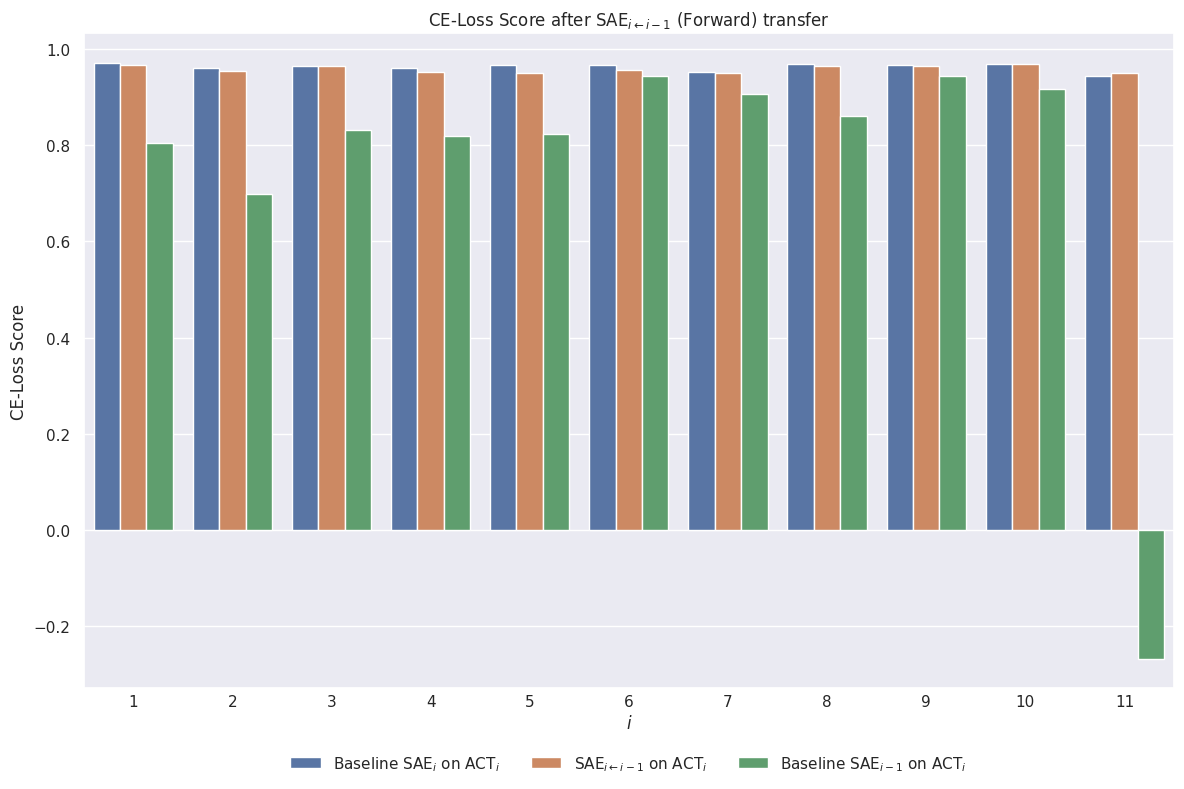

In [16]:
df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[1:]  # we don't 
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        fwd[(fwd["SAE-Layer"] == fwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "SAE$_{i \leftarrow i-1}$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] - 1 == baseline["SAE-Layer"]]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_{i-1}$ on ACT$_{i}$"}),
    ],
    axis=1,
)

# Reset index to use for plotting
df = df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="SAE")

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x="index", y="SAE", hue="Metric")
ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")

plt.title("CE-Loss Score after SAE$_{i\leftarrow i-1}$ (Forward) transfer")
plt.xlabel("$i$")
plt.ylabel("CE-Loss Score")
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.15), ncol=3, title=None, frameon=False)
#  plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipykernel_372870/235848984.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")


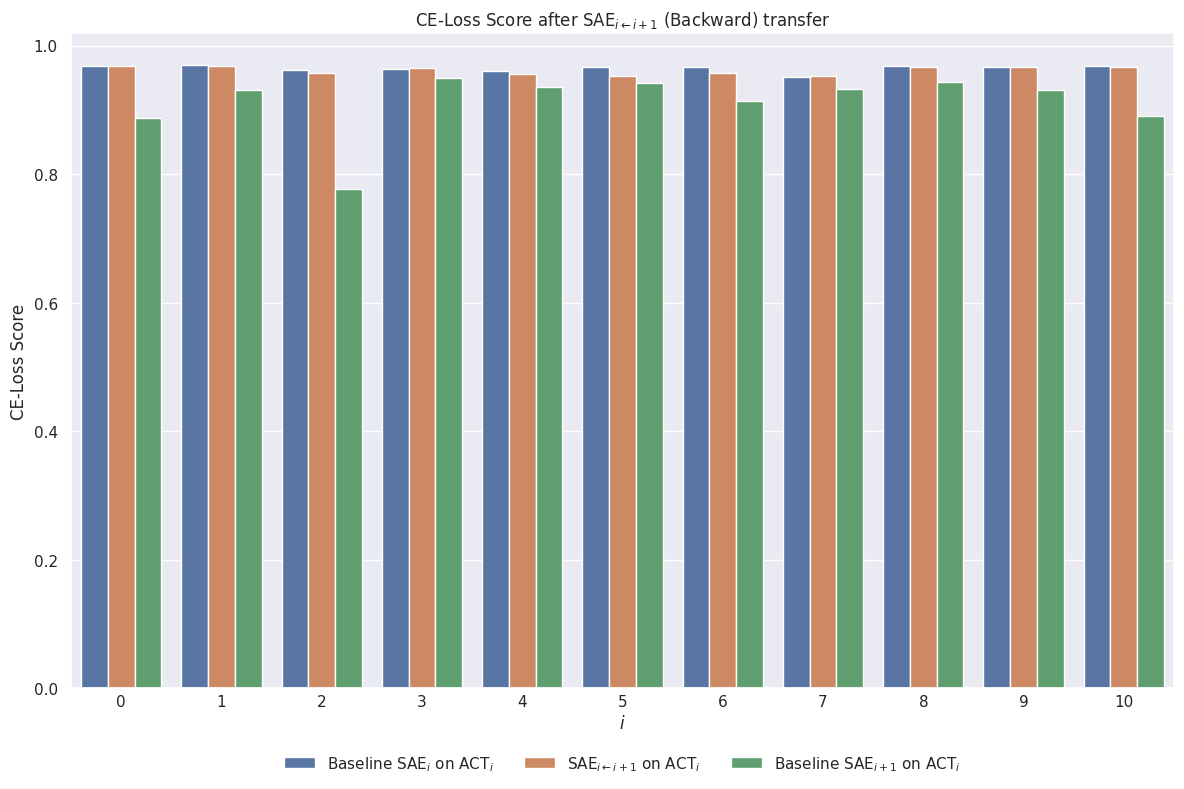

In [17]:
df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[:-1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        bwd[(bwd["SAE-Layer"] == bwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "SAE$_{i \leftarrow i+1}$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_{i+1}$ on ACT$_{i}$"}),
    ],
    axis=1,
)

# Reset index to use for plotting
df = df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="SAE")

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x="index", y="SAE", hue="Metric")
ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")

plt.title("CE-Loss Score after SAE$_{i\leftarrow i+1}$ (Backward) transfer")
plt.xlabel("$i$")
plt.ylabel("CE-Loss Score")
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.15), ncol=3, title=None, frameon=False)
# plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Normalized scores

In [18]:
# Forward
fwd_df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[1:]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        fwd[(fwd["SAE-Layer"] == fwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "SAE$_{i \leftarrow i-1}$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] - 1 == baseline["SAE-Layer"]]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_{i-1}$ on ACT$_{i}$"}),
    ],
    axis=1,
)
fwd_df

,Baseline SAE$_i$ on ACT$_i$,SAE$_{i \leftarrow i-1}$ on ACT$_i$,Baseline SAE$_{i-1}$ on ACT$_{i}$
0,0.970317,0.965752,0.804989
1,0.961339,0.954668,0.699420
2,0.963667,0.964382,0.830709
3,0.960696,0.953110,0.818913
4,0.966709,0.949641,0.823634
5,0.966613,0.955462,0.944833
6,0.951533,0.951121,0.907179
7,0.968072,0.964287,0.861625
8,0.966408,0.964769,0.943439
9,0.968863,0.967856,0.916294


In [19]:
fwd_df = fwd_df.to_numpy()
# (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
scores = (fwd_df[:, 1] - fwd_df[:, 2]) / (fwd_df[:, 0] - fwd_df[:, 2])
scores

array([0.97238624, 0.97453209, 1.00538179, 0.94649438, 0.8807042 ,
       0.48802573, 0.99071598, 0.96444775, 0.92865187, 0.98083673,
       1.00591926])

In [20]:
# Backward
bwd_df = pd.concat(
    [
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
        .iloc[:-1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
        bwd[(bwd["SAE-Layer"] == bwd["ACT-Layer"])]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "SAE$_{i \leftarrow i+1}$ on ACT$_i$"}),
        baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
        .reset_index(drop=True)[["ce_loss_score"]]
        .rename(columns={"ce_loss_score": "Baseline SAE$_{i+1}$ on ACT$_{i}$"}),
    ],
    axis=1,
)
bwd_df

,Baseline SAE$_i$ on ACT$_i$,SAE$_{i \leftarrow i+1}$ on ACT$_i$,Baseline SAE$_{i+1}$ on ACT$_{i}$
0,0.968835,0.968558,0.887747
1,0.970317,0.968370,0.930840
2,0.961339,0.956727,0.777337
3,0.963667,0.965016,0.949862
4,0.960696,0.956239,0.934969
5,0.966709,0.952280,0.941604
6,0.966613,0.956670,0.913071
7,0.951533,0.952574,0.932931
8,0.968072,0.965988,0.944009
9,0.966408,0.966349,0.931585


In [21]:
bwd_df = bwd_df.to_numpy()
# (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
scores = (bwd_df[:, 1] - bwd_df[:, 2]) / (bwd_df[:, 0] - bwd_df[:, 2])
scores

array([0.99658502, 0.95067035, 0.97493452, 1.09772266, 0.82674974,
       0.42526147, 0.81430109, 1.05596932, 0.91339847, 0.99831077,
       0.9755459 ])

/tmp/ipykernel_372870/2047516363.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_372870/2047516363.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_372870/2047516363.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_372870/2047516363.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")
/tmp/ipykernel_372870/2047516363.py:37: UserWarning: set_ticklabels(

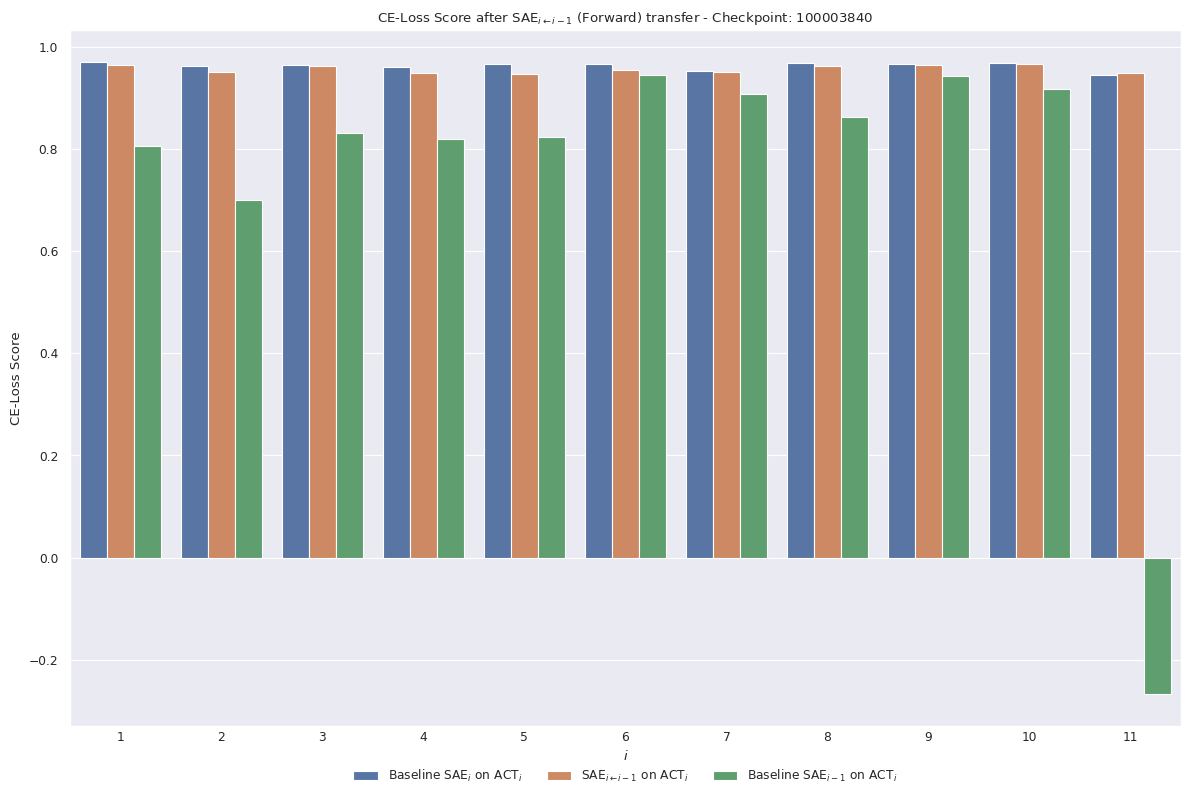

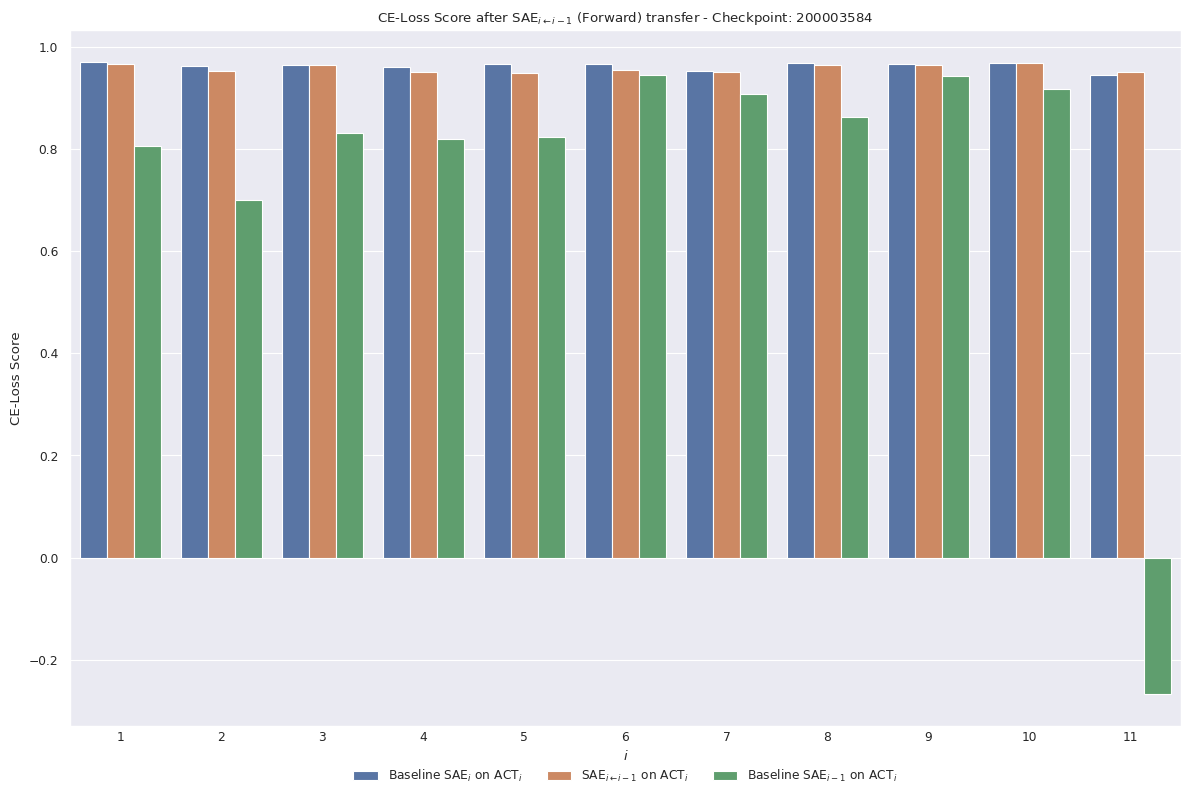

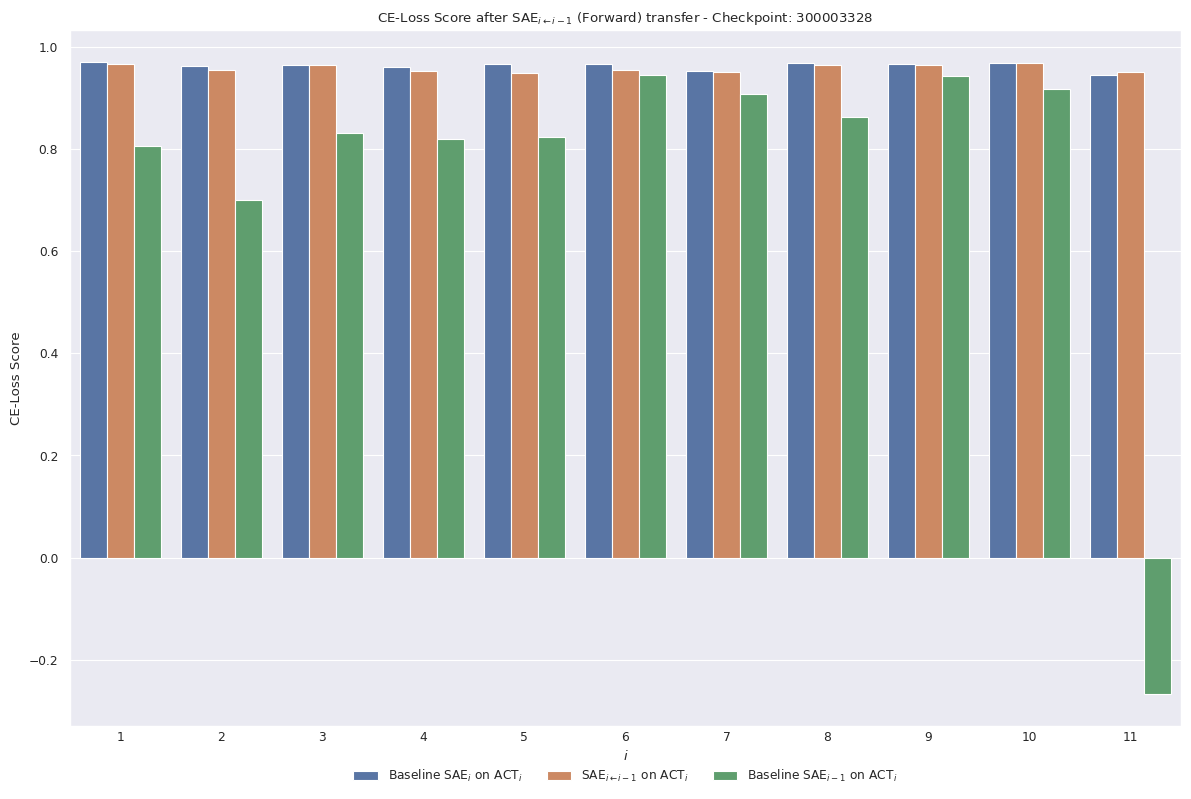

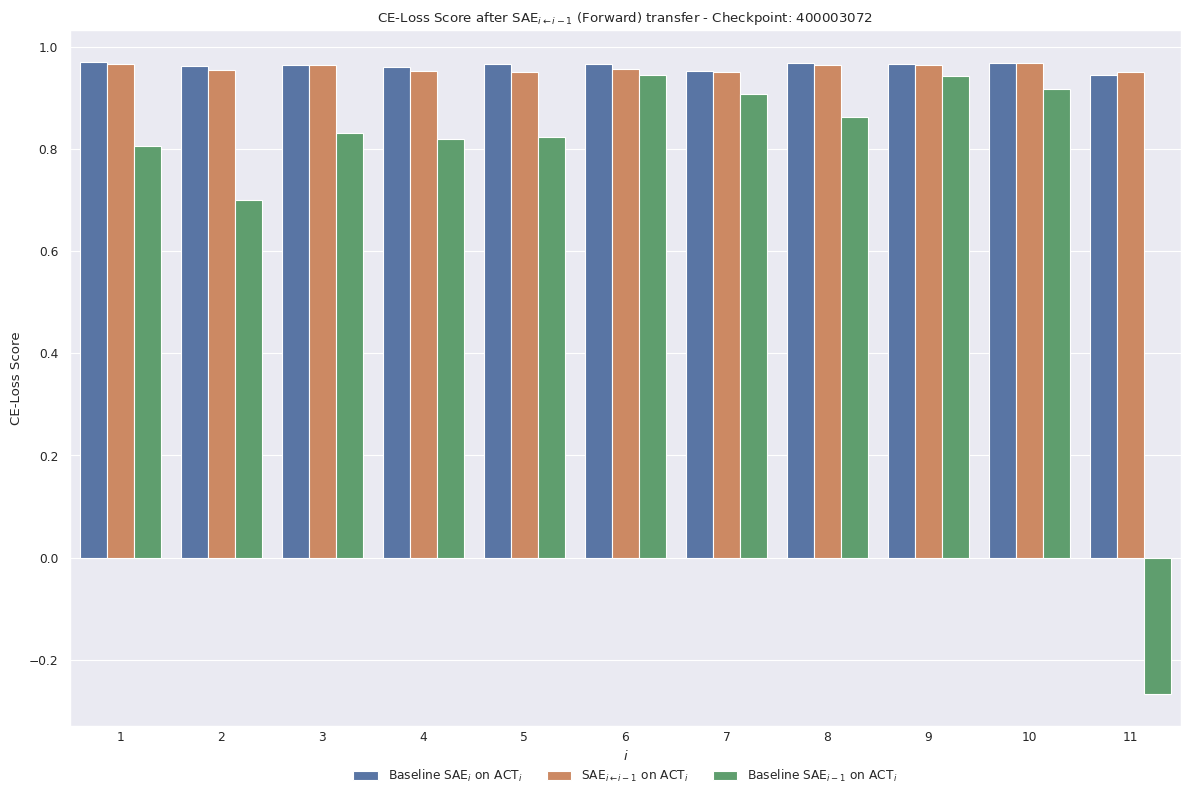

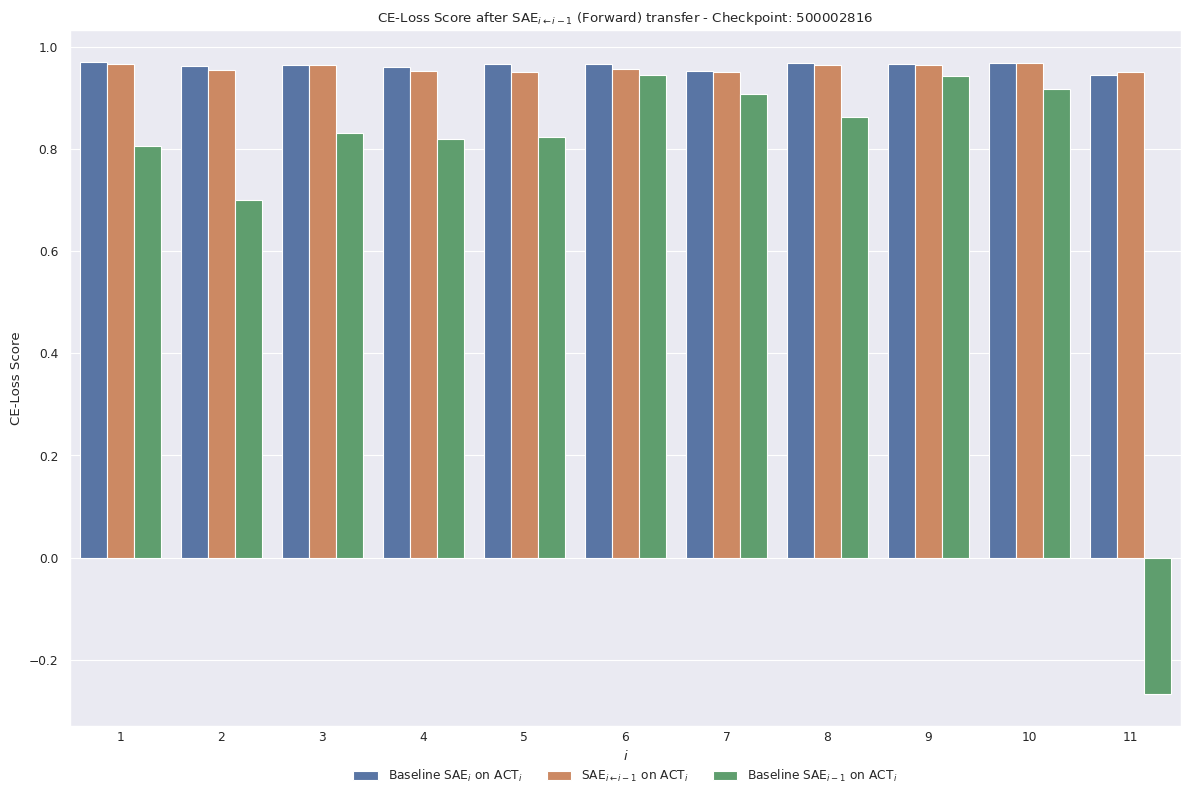

In [22]:
sns.set_context("paper")

# Automatic for every ckpt - forward
fwd_dfs = []
fwd_scores = {}
for ckpt in mapping.values():
    fwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_forward_{ckpt}_all.csv")
    fwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
    fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
    fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int) + 1
    fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    fwd_df = pd.concat(
        [
            baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
            .iloc[1:]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
            fwd[(fwd["SAE-Layer"] == fwd["ACT-Layer"])]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "SAE$_{i \leftarrow i-1}$ on ACT$_i$"}),
            baseline[baseline["ACT-Layer"] - 1 == baseline["SAE-Layer"]]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline SAE$_{i-1}$ on ACT$_{i}$"}),
        ],
        axis=1,
    )
    fwd_dfs.append(fwd_df)

    # Plot
    # Reset index to use for plotting
    df = fwd_df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="SAE")

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df, x="index", y="SAE", hue="Metric")
    ax.set_xticklabels(np.arange(1, 12), va="center", ha="center")

    plt.title("CE-Loss Score after SAE$_{i\leftarrow i-1}$ (Forward) transfer - Checkpoint: " + ckpt.replace("final_", ""))
    plt.xlabel("$i$")
    plt.ylabel("CE-Loss Score")
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.1), ncol=3, title=None, frameon=False)
    plt.tight_layout()
    plt.savefig(IMG_PATH + f"barplot_fwd_{ckpt}.png")

    fwd_df = fwd_df.to_numpy()
    # (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
    scores = (fwd_df[:, 1] - fwd_df[:, 2]) / (fwd_df[:, 0] - fwd_df[:, 2])
    fwd_scores[ckpt.replace("final_", "")] = list(round(x, 3) for x in scores)

In [23]:
pd.DataFrame.from_dict(fwd_scores, orient="index", columns=list(range(1, 12)))

,1,2,3,4,5,6,7,8,9,10,11
100003840,0.962,0.960,0.983,0.920,0.865,0.439,0.955,0.948,0.858,0.944,1.003
200003584,0.968,0.968,0.996,0.933,0.873,0.459,0.970,0.956,0.894,0.965,1.005
300003328,0.969,0.971,1.000,0.941,0.877,0.475,0.981,0.960,0.911,0.972,1.005
400003072,0.971,0.974,1.003,0.944,0.879,0.479,0.988,0.963,0.921,0.978,1.006
500002816,0.972,0.975,1.005,0.946,0.881,0.488,0.991,0.964,0.929,0.981,1.006


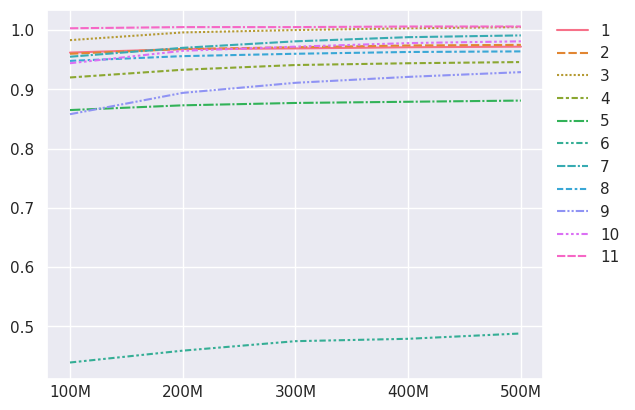

In [24]:
fwd_scores_df = pd.DataFrame.from_dict(fwd_scores, orient="index", columns=list(range(1, 12)))
sns.set_theme()
ax = sns.lineplot(data=fwd_scores_df)
ax.get_legend().set_title("SAE Layer")
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=1, title=None, frameon=False)

/tmp/ipykernel_372870/2914534289.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
/tmp/ipykernel_372870/2914534289.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
/tmp/ipykernel_372870/2914534289.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
/tmp/ipykernel_372870/2914534289.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")
/tmp/ipykernel_372870/2914534289.py:37: UserWarning: set_ticklabels(

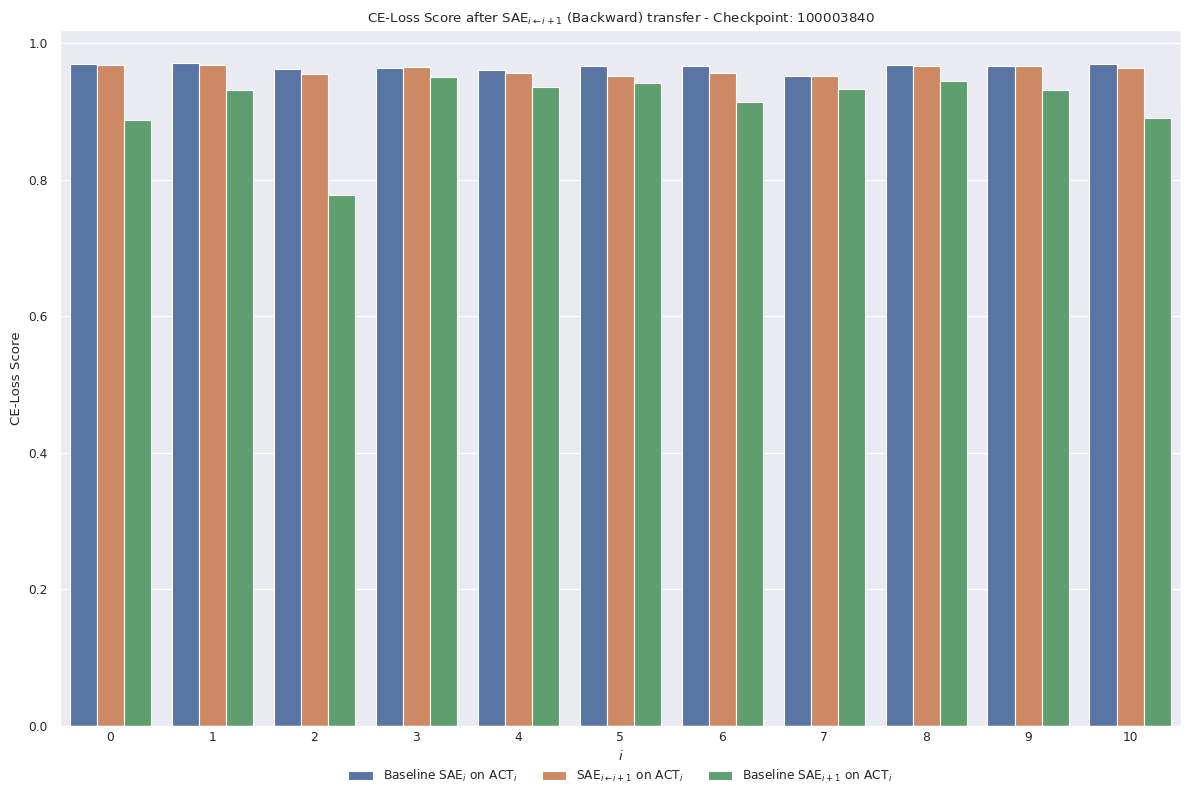

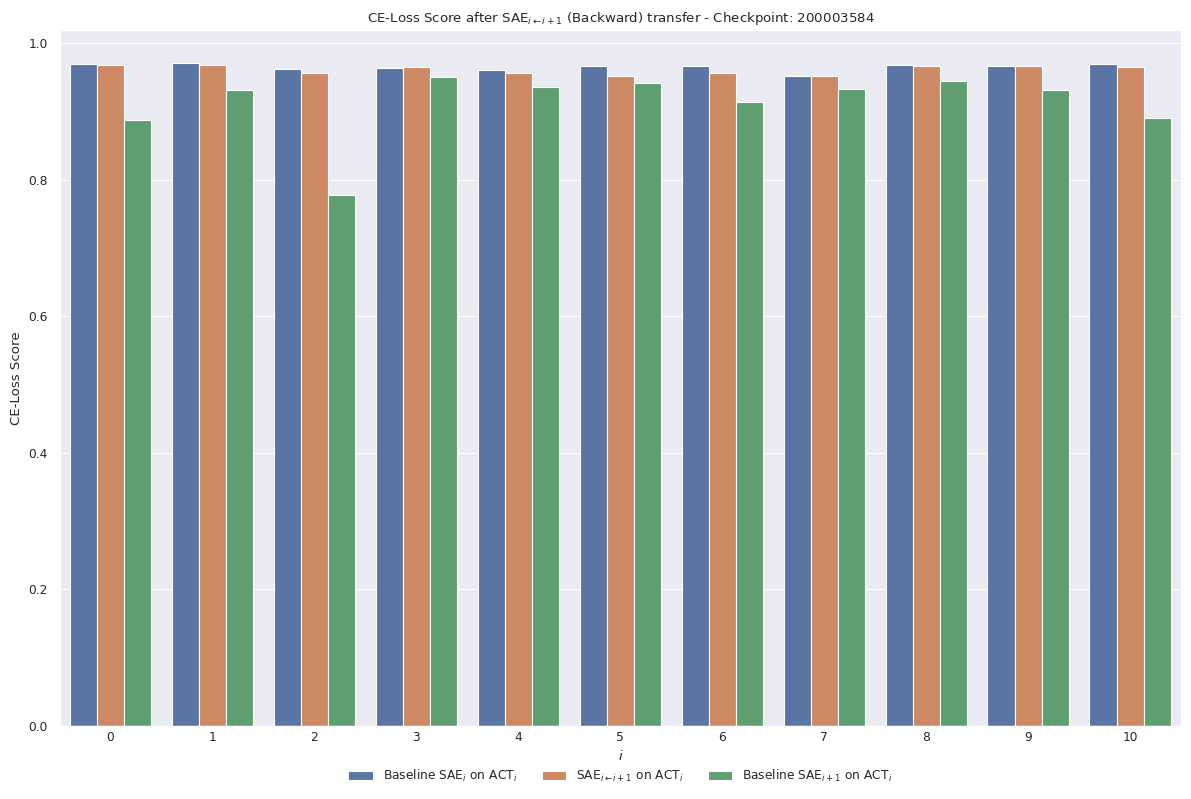

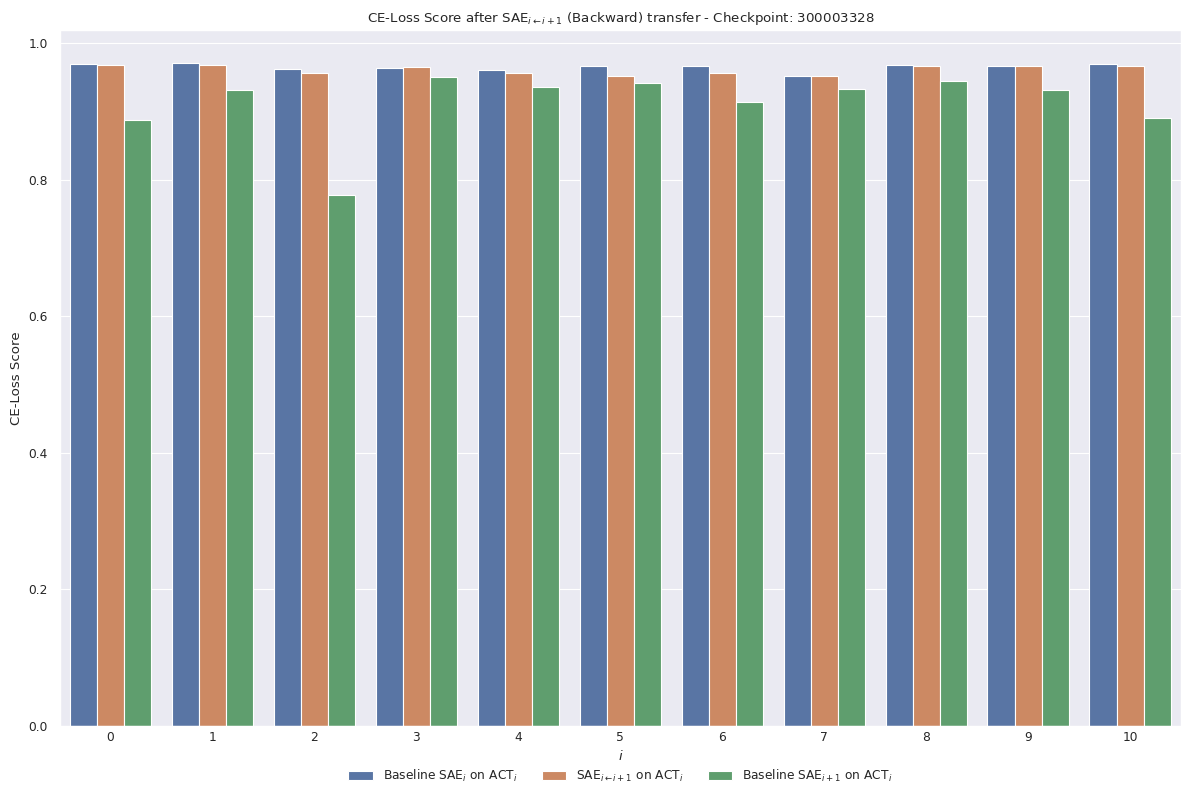

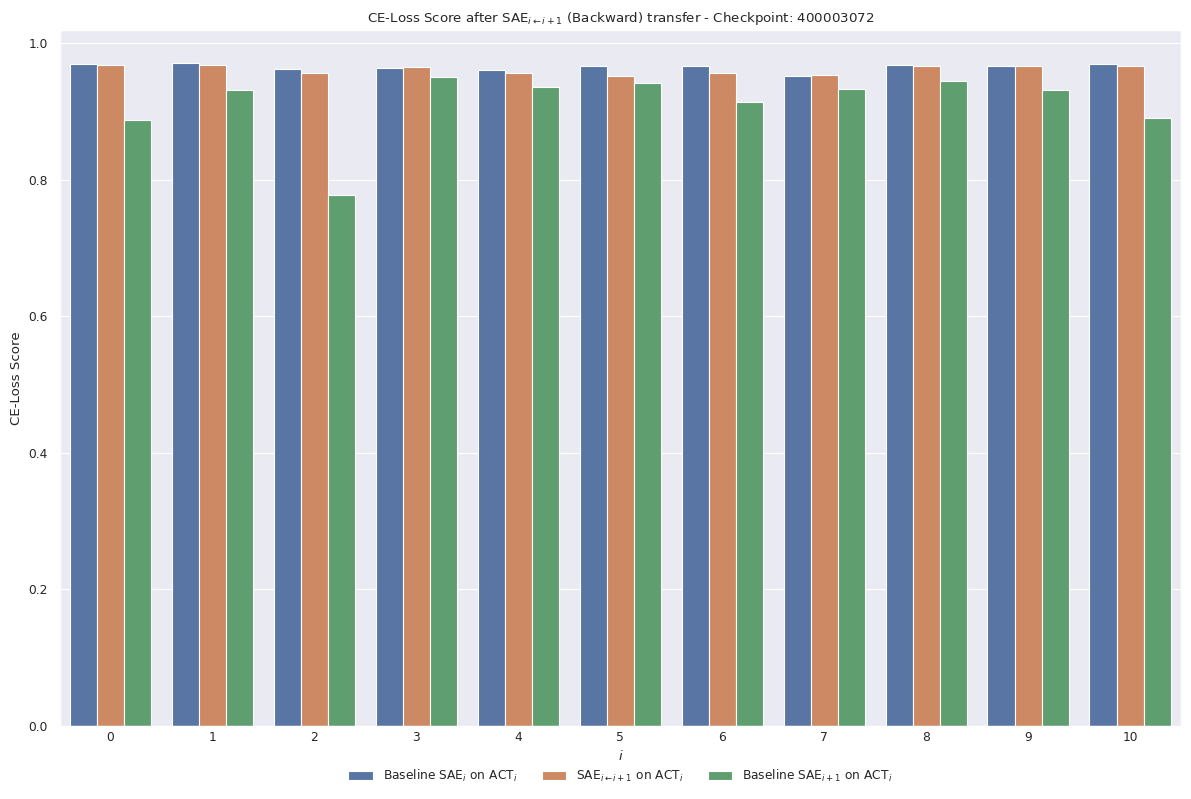

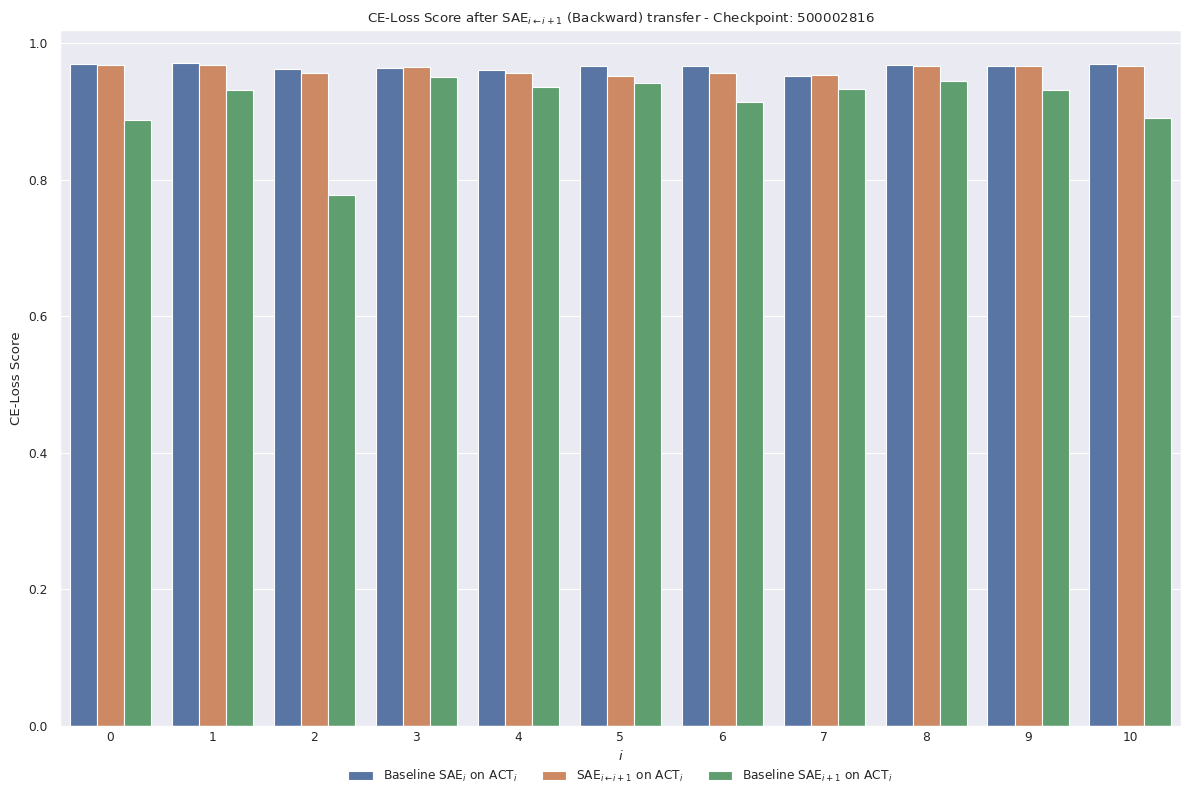

In [25]:
sns.set_context("paper")

# Automatic for every ckpt - backward
bwd_dfs = []
bwd_scores = {}
for ckpt in mapping.values():
    bwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_backward_{ckpt}_all.csv")
    bwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
    bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
    bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int) - 1
    bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    bwd_df = pd.concat(
        [
            baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
            .iloc[:-1]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline SAE$_i$ on ACT$_i$"}),
            bwd[(bwd["SAE-Layer"] == bwd["ACT-Layer"])]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "SAE$_{i \leftarrow i+1}$ on ACT$_i$"}),
            baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
            .reset_index(drop=True)[["ce_loss_score"]]
            .rename(columns={"ce_loss_score": "Baseline SAE$_{i+1}$ on ACT$_{i}$"}),
        ],
        axis=1,
    )
    bwd_dfs.append(bwd_df)

    # Plot
    # Reset index to use for plotting
    df = bwd_df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="SAE")

    # Plotting using Seaborn
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df, x="index", y="SAE", hue="Metric")
    ax.set_xticklabels(np.arange(0, 11), va="center", ha="center")

    plt.title("CE-Loss Score after SAE$_{i\leftarrow i+1}$ (Backward) transfer - Checkpoint: " + ckpt.replace("final_", ""))
    plt.xlabel("$i$")
    plt.ylabel("CE-Loss Score")
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -0.1), ncol=3, title=None, frameon=False)
    plt.tight_layout()
    plt.savefig(IMG_PATH + f"barplot_bwd_{ckpt}.png")

    bwd_df = bwd_df.to_numpy()
    # (Sae - (base i +- 1)) / ((base i) - (base i +- 1))
    scores = (bwd_df[:, 1] - bwd_df[:, 2]) / (bwd_df[:, 0] - bwd_df[:, 2])
    bwd_scores[ckpt.replace("final_", "")] = list(round(x, 3) for x in scores)

In [26]:
baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]

,L,kl_div_with_sae,kl_div_with_ablation,ce_loss_with_sae,ce_loss_without_sae,ce_loss_with_ablation,kl_div_score,ce_loss_score,l2_norm_in,l2_norm_out,l2_ratio,l0,l1,explained_variance,mse,total_tokens_evaluated,ACT-Layer,SAE-Layer
1,0-1,NaN,NaN,4.367182,3.160122,13.913139,NaN,0.887747,8.866869,10.670202,1.188830,48.587891,16.943966,0.444341,38.588085,262144.0,0,1
14,1-2,NaN,NaN,4.005270,3.115358,15.982838,NaN,0.930840,11.296371,11.002556,0.952868,55.972656,19.091072,0.519058,69.278900,262144.0,1,2
27,2-3,NaN,NaN,4.945744,3.203166,11.029239,NaN,0.777337,12.878527,11.017860,0.830533,73.272827,26.313818,0.488184,142.942963,262144.0,2,3
40,3-4,NaN,NaN,3.730921,3.009706,17.394283,NaN,0.949862,13.969690,12.371120,0.883886,121.014771,35.400150,0.594157,62.342289,262144.0,3,4
53,4-5,NaN,NaN,4.013016,3.079556,17.433718,NaN,0.934969,14.427039,14.894337,1.028894,137.443115,40.874561,0.477879,92.044044,262144.0,4,5
66,5-6,NaN,NaN,3.900226,3.164787,15.758782,NaN,0.941604,17.523409,17.923725,0.994077,166.343018,51.800484,0.531260,105.157806,262144.0,5,6
79,6-7,NaN,NaN,3.920360,3.034473,13.225407,NaN,0.913071,18.164986,16.357956,0.887359,137.811401,42.022144,0.613619,104.043411,262144.0,6,7
92,7-8,NaN,NaN,3.814109,3.094152,13.828719,NaN,0.932931,22.426210,25.075481,1.098537,241.776733,78.859589,0.646864,154.365677,262144.0,7,8
105,8-9,NaN,NaN,3.691324,3.072817,14.119305,NaN,0.944009,25.181238,30.612350,1.188466,306.857910,102.959206,0.545964,221.891190,262144.0,8,9
118,9-10,NaN,NaN,3.803697,3.122844,13.074701,NaN,0.931585,25.073803,27.933483,1.093804,351.222412,114.238831,0.582084,213.220856,262144.0,9,10


In [27]:
pd.DataFrame.from_dict(bwd_scores, orient="index", columns=list(range(0, 11)))

,0,1,2,3,4,5,6,7,8,9,10
100003840,0.988,0.927,0.964,1.052,0.803,0.375,0.801,1.044,0.920,1.005,0.939
200003584,0.990,0.939,0.969,1.076,0.812,0.396,0.805,1.047,0.912,1.001,0.953
300003328,0.991,0.945,0.972,1.084,0.823,0.412,0.808,1.049,0.913,0.999,0.965
400003072,0.995,0.951,0.975,1.098,0.827,0.420,0.811,1.052,0.912,0.997,0.972
500002816,0.997,0.951,0.975,1.098,0.827,0.425,0.814,1.056,0.913,0.998,0.976


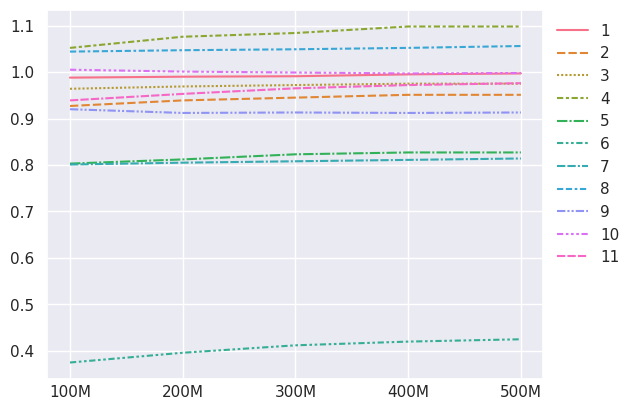

In [28]:
bwd_scores_df = pd.DataFrame.from_dict(bwd_scores, orient="index", columns=list(range(1, 12)))
sns.set_theme()
ax = sns.lineplot(data=bwd_scores_df)
ax.get_legend().set_title("SAE Layer")
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=1, title=None, frameon=False)

### L0 plots - bwd

In [29]:
# Automatic for every ckpt - backward
l0_bwd_dfs = []
for ckpt in mapping.values():
    bwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_backward_{ckpt}_all.csv")
    bwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    bwd[["ACT-Layer", "SAE-Layer"]] = bwd["L"].str.split("-", n=1, expand=True)
    bwd["ACT-Layer"] = bwd["ACT-Layer"].astype(int)
    bwd["SAE-Layer"] = bwd["SAE-Layer"].astype(int) - 1
    bwd = bwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    bwd_df = pd.concat(
        [
            baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
            .iloc[:-1]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline SAE$_i$ on ACT$_i$"}),
            bwd[(bwd["SAE-Layer"] == bwd["ACT-Layer"])]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "SAE$_{i \leftarrow i+1}$ on ACT$_i$"}),
            baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline SAE$_{i+1}$ on ACT$_{i}$"}),
        ],
        axis=1,
    )
    bwd_df["checkpoint"] = ckpt.replace("final_", "")
    l0_bwd_dfs.append(bwd_df)

In [30]:
pd.concat(l0_bwd_dfs[:2], axis=0)

,Baseline SAE$_i$ on ACT$_i$,SAE$_{i \leftarrow i+1}$ on ACT$_i$,Baseline SAE$_{i+1}$ on ACT$_{i}$,checkpoint
0,13.532349,18.719727,48.587891,100003840
1,21.895020,26.103760,55.972656,100003840
2,34.881470,46.136841,73.272827,100003840
3,71.514771,79.482666,121.014771,100003840
4,75.308472,83.319336,137.443115,100003840
5,73.202515,85.591309,166.343018,100003840
6,96.454590,109.043213,137.811401,100003840
7,131.835938,140.024902,241.776733,100003840
8,145.001587,150.912354,306.857910,100003840
9,169.779785,174.685181,351.222412,100003840


In [31]:
l0_bwd_dfs_plot = pd.concat(l0_bwd_dfs, axis=0).reset_index(names="i").melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
l0_bwd_dfs_plot.head()

,checkpoint,i,type,l0
0,100003840,0,Baseline SAE$_i$ on ACT$_i$,13.532349
1,100003840,1,Baseline SAE$_i$ on ACT$_i$,21.895020
2,100003840,2,Baseline SAE$_i$ on ACT$_i$,34.881470
3,100003840,3,Baseline SAE$_i$ on ACT$_i$,71.514771
4,100003840,4,Baseline SAE$_i$ on ACT$_i$,75.308472


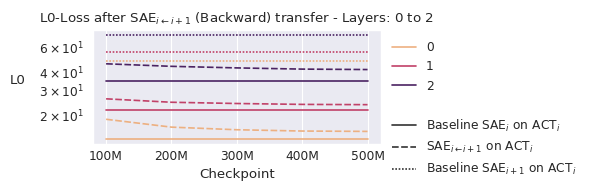

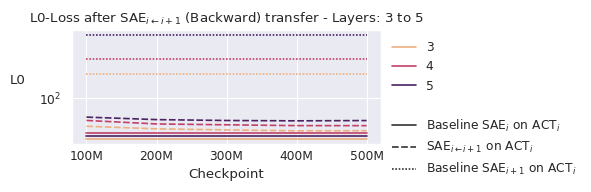

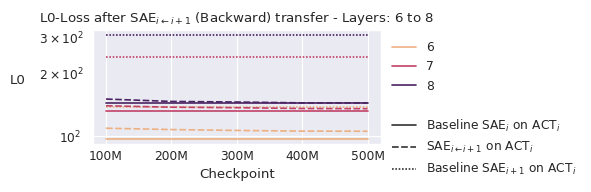

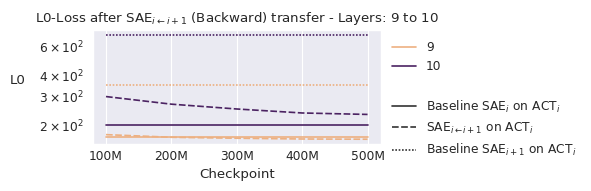

In [91]:
sns.set_context("paper")

for layers in [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]:
    plt.figure(figsize=(6, 2))  # width=12 inches, height=6 inches
    plt.title(
        "L0-Loss after SAE$_{i\leftarrow i+1}$ (Backward) transfer - Layers: "
        + str(layers[0])
        + " to "
        + str(layers[-1])
    )
    ax = sns.lineplot(
        data=l0_bwd_dfs_plot[l0_bwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style="bars",
        legend="brief",
        palette=sns.color_palette("flare", as_cmap=True),
    )
    ax.set_xticks(np.arange(5))
    ax.set_xlabel("Checkpoint")
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_ylabel("L0", rotation=0, labelpad=15)
    ax.set_yscale("log")
    ax.tick_params(axis="y", which="minor", bottom=False, left=False, reset=False)
    h, l = ax.get_legend_handles_labels()
    new_h = []
    new_l = []
    for i in range(len(h)):
        if l[i] == "i":
            continue
        elif l[i] == "type":
            new_h.append(h[i])
            new_l.append("")
        else:
            new_h.append(h[i])
            new_l.append(l[i])
    ax.legend(new_h, new_l)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=1, title=None, frameon=False)
    # sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.35), ncol=8, title=None, frameon=False)
    plt.tight_layout()
    plt.savefig(IMG_PATH + f"lineplot_bwd_l0_{layers[0]}_{layers[-1]}.png")

/tmp/ipykernel_372870/12652554.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_372870/12652554.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_372870/12652554.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_372870/12652554.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="ce

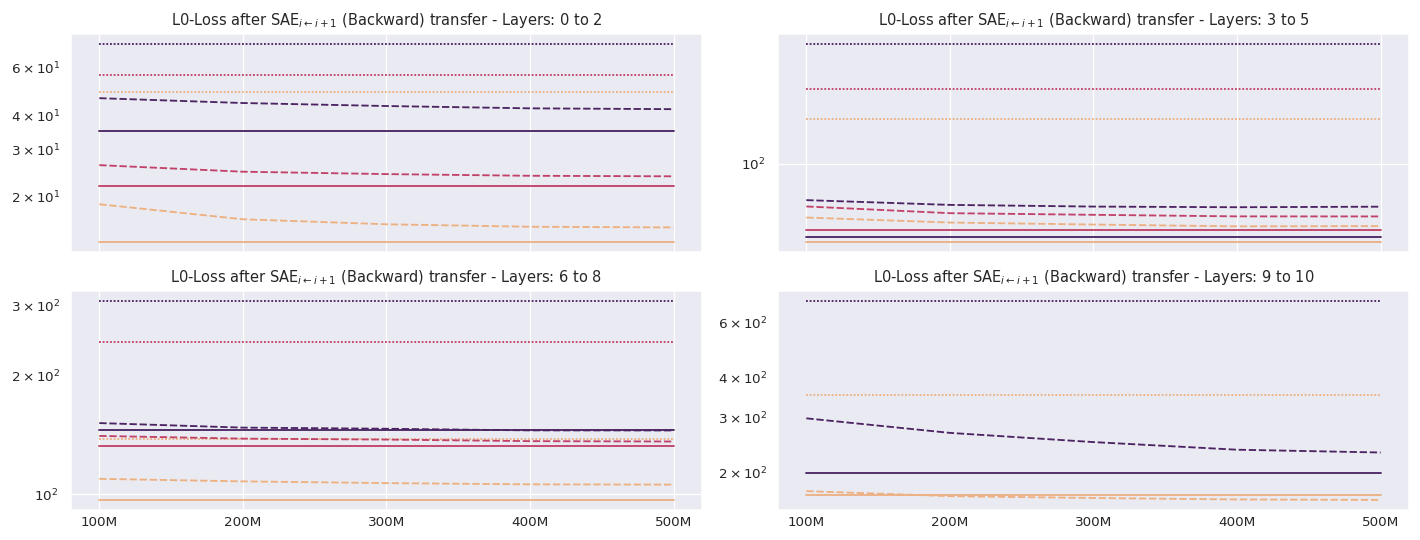

In [103]:
sns.set_context("paper")

fig, axes = plt.subplots(2, 2, figsize=(13, 5), sharex=True, sharey=False, dpi=110)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    ax.set_title(
        "L0-Loss after SAE$_{i\leftarrow i+1}$ (Backward) transfer - Layers: "
        + str(layers[0])
        + " to "
        + str(layers[-1])
    )
    sns.lineplot(
        data=l0_bwd_dfs_plot[l0_bwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style="bars",
        legend=None,
        palette=sns.color_palette("flare", as_cmap=True),
        ax=ax,
    )
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_yscale("log")
plt.grid(False)
plt.tight_layout()
plt.savefig(IMG_PATH + f"lineplot_bwd_all.png")

### L0 plots - fwd

In [104]:
# Automatic for every ckpt - backward
l0_fwd_dfs = []
for ckpt in mapping.values():
    fwd = pd.read_csv(EVAL_PATH + f"rs-post_transfer_backward_{ckpt}_all.csv")
    fwd.rename(columns={"Unnamed: 0": "L"}, inplace=True)
    fwd[["ACT-Layer", "SAE-Layer"]] = fwd["L"].str.split("-", n=1, expand=True)
    fwd["ACT-Layer"] = fwd["ACT-Layer"].astype(int)
    fwd["SAE-Layer"] = fwd["SAE-Layer"].astype(int) - 1
    fwd = fwd.sort_values(by=["ACT-Layer", "SAE-Layer"])
    fwd_df = pd.concat(
        [
            baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"]]
            .iloc[:-1]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline SAE$_i$ on ACT$_i$"}),
            fwd[(fwd["SAE-Layer"] == fwd["ACT-Layer"])]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "SAE$_{i \leftarrow i+1}$ on ACT$_i$"}),
            baseline[baseline["ACT-Layer"] == baseline["SAE-Layer"] - 1]
            .reset_index(drop=True)[["l0"]]
            .rename(columns={"l0": "Baseline SAE$_{i+1}$ on ACT$_{i}$"}),
        ],
        axis=1,
    )
    fwd_df["checkpoint"] = ckpt.replace("final_", "")
    l0_fwd_dfs.append(fwd_df)

In [105]:
pd.concat(l0_fwd_dfs[:2], axis=0)

,Baseline SAE$_i$ on ACT$_i$,SAE$_{i \leftarrow i+1}$ on ACT$_i$,Baseline SAE$_{i+1}$ on ACT$_{i}$,checkpoint
0,13.532349,18.719727,48.587891,100003840
1,21.895020,26.103760,55.972656,100003840
2,34.881470,46.136841,73.272827,100003840
3,71.514771,79.482666,121.014771,100003840
4,75.308472,83.319336,137.443115,100003840
5,73.202515,85.591309,166.343018,100003840
6,96.454590,109.043213,137.811401,100003840
7,131.835938,140.024902,241.776733,100003840
8,145.001587,150.912354,306.857910,100003840
9,169.779785,174.685181,351.222412,100003840


In [106]:
l0_fwd_dfs_plot = pd.concat(l0_fwd_dfs, axis=0).reset_index(names="i").melt(id_vars=["checkpoint", "i"], var_name="type", value_name="l0")
l0_fwd_dfs_plot["i"] = l0_fwd_dfs_plot["i"] + 1
l0_fwd_dfs_plot.head()

,checkpoint,i,type,l0
0,100003840,1,Baseline SAE$_i$ on ACT$_i$,13.532349
1,100003840,2,Baseline SAE$_i$ on ACT$_i$,21.895020
2,100003840,3,Baseline SAE$_i$ on ACT$_i$,34.881470
3,100003840,4,Baseline SAE$_i$ on ACT$_i$,71.514771
4,100003840,5,Baseline SAE$_i$ on ACT$_i$,75.308472


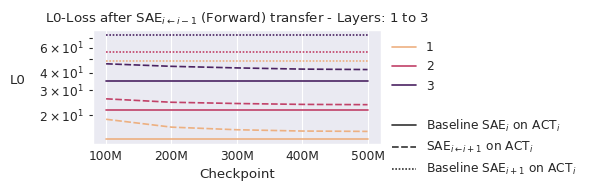

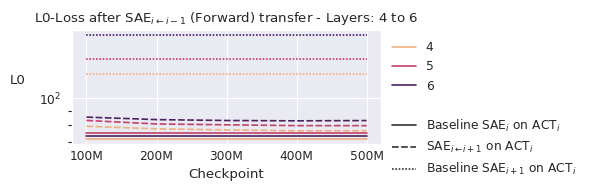

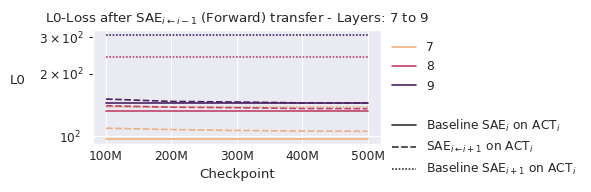

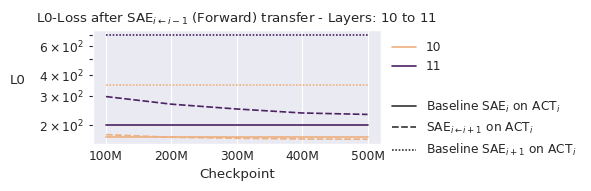

In [107]:
sns.set_context("paper")

for layers in [[1,2,3], [4,5,6], [7,8,9], [10,11]]:
    plt.figure(figsize=(6,2))  # width=12 inches, height=6 inches
    plt.title(
        "L0-Loss after SAE$_{i\leftarrow i-1}$ (Forward) transfer - Layers: "
        + str(layers[0])
        + " to "
        + str(layers[-1])
    )
    ax = sns.lineplot(
        data=l0_fwd_dfs_plot[l0_fwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style=None,
        legend="full",
        palette=sns.color_palette("flare", as_cmap=True),
    )
    ax.set_xticks(np.arange(5))
    ax.set_xlabel("Checkpoint")
    ax.set_ylabel("L0", rotation=0, labelpad=15)
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_yscale("log")
    ax.tick_params(axis="y", which="minor", bottom=False, left=True, reset=False)
    h, l = ax.get_legend_handles_labels()
    new_h = []
    new_l = []
    for i in range(len(h)):
        if l[i] == "i":
            continue
        elif l[i] == "type":
            new_h.append(h[i])
            new_l.append("")
        else:
            new_h.append(h[i])
            new_l.append(l[i])
    ax.legend(new_h, new_l)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=1, title=None, frameon=False)
    # sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, -0.25), ncol=8, title=None, frameon=False)
    plt.tight_layout()
    plt.savefig(IMG_PATH + f"lineplot_fwd_l0_{layers[0]}_{layers[-1]}.png")

/tmp/ipykernel_372870/50449590.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_372870/50449590.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_372870/50449590.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
/tmp/ipykernel_372870/50449590.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="ce

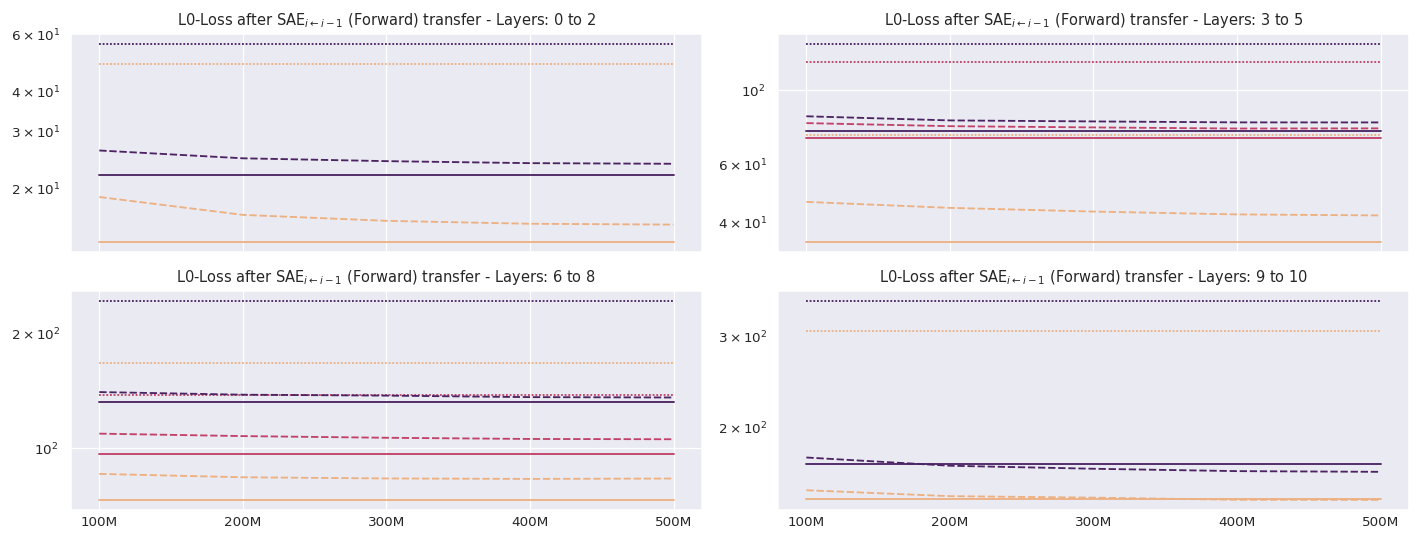

In [108]:
sns.set_context("paper")

fig, axes = plt.subplots(2, 2, figsize=(13, 5), sharex=True, sharey=False, dpi=110)
for i, layers in enumerate([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10]]):
    ax = axes[i // 2, i % 2]
    ax.set_title(
        "L0-Loss after SAE$_{i\leftarrow i-1}$ (Forward) transfer - Layers: "
        + str(layers[0])
        + " to "
        + str(layers[-1])
    )
    sns.lineplot(
        data=l0_fwd_dfs_plot[l0_fwd_dfs_plot["i"].isin(layers)],
        x="checkpoint",
        y="l0",
        hue="i",
        style="type",
        err_style="bars",
        legend=None,
        palette=sns.color_palette("flare", as_cmap=True),
        ax=ax,
    )
    ax.set_xticklabels(["100M", "200M", "300M", "400M", "500M"], va="center", ha="center")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_yscale("log")
plt.grid(False)
plt.tight_layout()
plt.savefig(IMG_PATH + f"lineplot_fwd_all.png")

## Distances

In [ ]:
import torch
from sae_lens import ActivationsStore, HookedSAETransformer
from sae_lens.config import LanguageModelSAERunnerConfig
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
cfg = LanguageModelSAERunnerConfig(
    # Data Generating Function (Model + Training Distibuion)
    model_name="pythia-160m-deduped",
    hook_name=None,
    hook_layer=None,
    dataset_path="NeelNanda/pile-small-tokenized-2b",
    is_dataset_tokenized=True,
    context_size=1024,
    streaming=True,
    # SAE Parameters
    architecture="jumprelu",
    d_in=768,
    d_sae=None,
    b_dec_init_method="zeros",
    expansion_factor=8,
    activation_fn="relu",  # relu, tanh-relu, topk
    normalize_sae_decoder=True,
    from_pretrained_path=None,
    apply_b_dec_to_input=False,
    # Activation Store Parameters
    n_batches_in_buffer=128,
    # Misc
    device=device,
    seed=42,
    dtype="float32",
    prepend_bos=False,
)

model = HookedSAETransformer.from_pretrained("pythia-160m-deduped").to(device)
activation_store = ActivationsStore.from_config(model, cfg)

In [ ]:
n_batches = 8
batch_size = 8

activations = []

for _ in tqdm(range(n_batches)):
    batch_tokens = activation_store.get_batch_tokens(batch_size)
    with torch.no_grad():
        _, cache = model.run_with_cache(batch_tokens)

    activations.append(cache.stack_activation('resid_post').cpu())
    del cache

activations = torch.cat(activations, dim=1).reshape(model.cfg.n_layers, -1, model.cfg.d_model) # [L, N, D]

In [ ]:
activations.shape

In [ ]:
# Compute the dot product between pairs of layers along dimension N
dot_products = torch.einsum('ijk,mjk->jim', activations, activations) # [N, L, L]

# Compute the norms of each layer vector
norms = torch.norm(activations, dim=-1)  # [L, N]

# Compute normalized dot products
normalized_dot_products = dot_products / torch.einsum('ik,jk->kij', norms, norms)  # [N, L, L]

# Ensure numerical stability by clamping the values in the range [-1, 1]
normalized_dot_products = torch.clamp(normalized_dot_products, -1.0, 1.0)

# Compute angular distances (arccos of the normalized dot products)
angular_distances = torch.acos(normalized_dot_products) / torch.pi * 2

# Average over dimension N
average_angular_distances = angular_distances.mean(dim=0)

In [ ]:
# Use seaborn to plot a heatmap out of baseline[["ce_loss_score"]].to_numpy().reshape(12, 12)
plt.figure(figsize=(7, 5.2), dpi=150)
sns.set_theme()
ax = sns.heatmap(
    average_angular_distances.cpu().numpy(),
    annot=True,
    fmt=".2f",
    cmap="Blues",
    annot_kws={"size": 8},
    # vmax=1,
    # vmin=-1,
    cbar=False
)
ax.set_title("Angular Distances")
ax.set_ylabel("Layer i")
ax.set_xlabel("Layer j")
ax.set_xticklabels(np.arange(0, 12), va="center", ha="center")
ax.set_yticklabels(np.arange(0, 12), va="center", ha="center")
plt.savefig(IMG_PATH + "heatmap_angular_distances.png")
plt.show()

In [ ]:
cache